# Debugging and visualizing data

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_PREFERENCES` is used to debug the `user_preferences` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_PREFERENCES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_PREFERENCES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 2  # num iterations of 'exploration'
RUN_TIMESTEPS = 3  # total num iterations
NUM_ITEMS = 10 #round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; items_representation: attributes of each item
rec_args['content']['A'] = 5
rec_args['content']['items_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['A']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['items_representation']):
    A = rec_args['content']['A']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['items_representation'][i,:] = row
# Add it to args
rec_args['content']['items_representation'] = rec_args['content']['items_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_PREFERENCES - Plot: Histogram of users liking each item the most


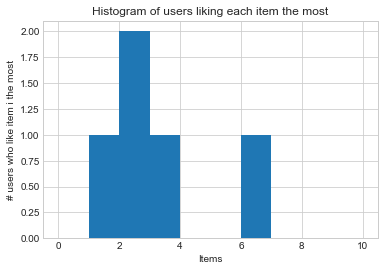

RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Actual scores given by users (rows) to items (columns), unknown to system:
[[3.53 11.79 3.24 6.83 7.88 1.35 4.87 8.03 6.34 1.22]
 [2.33 7.37 9.22 1.21 7.60 3.74 1.12 2.61 5.02 4.05]
 [7.75 0.83 0.60 12.02 1.14 4.63 5.53 2.71 2.71 9.34]
 [3.82 4.01 2.41 1.97 3.84 1.77 8.77 0.77 4.90 1.58]
 [5.11 5.89 8.03 4.34 7.88 0.42 2.38 0.54 7.85 2.31]]
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 5
RECOMMENDER - Attributes of each item (rows):
[[1.00 0.00 0.00 0.00 1.00]
 [0.00 1.00 1.00 0.00 1.00]
 [0.00 1.00 1.00 0.00 1.00]
 [0.00 1.00 0.00 1.00 0.00]
 [0.00 0.00 1.00 0.00 0.00]
 [0.00 1.00 0.00 1.00 0.00]
 [1.00 1.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 1.00]
 [1.00 1.00 0.00 0.00 0.00]
 [1.00 0.00 0.00 0.00 0.00]]
RECOMMENDER - User profiles known to the system represented by their attributes:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [

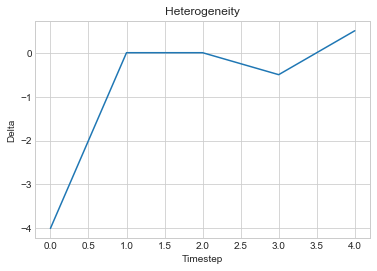

In [4]:
# Create recsys instance
if rec_args[RECSYS_TYPE] is None:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True,
        debugger=debugger)
else:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)
 # lambda function
delta_t = rec.get_heterogeneity()

In [6]:
# Run for a single step
rec.run(timesteps=1, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)

RECOMMENDER - Run -- interleave recommendation and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2]
 [4]
 [6]
 [7]
 [3]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[5]
 [1]
 [0]
 [6]
 [6]]
USER_PREFERENCES - User scores for given items are:
[[3.24 1.35]
 [7.60 7.37]
 [5.53 7.75]
 [0.77 8.77]
 [4.34 2.38]]
RECOMMENDER - Users choose the following items respectively:
[2 4 0 6 3]
RECOMMENDER - System updates user profiles based on last interaction:
[[3 4 1 2 3]
 [2 4 2 2 1]
 [2 3 1 3 3]
 [3 4 2 1 2]
 [2 4 2 2 2]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.10 0.13 0.13 0.10 0.02 0.10 0.12 0.08 0.12 0.05]
 [0.05 0.12 0.12 0.10 0.03 0.10 0.10 0.05 0.10 0.03]
 [0.08 0.12 0.12 0.10 0.02 0.10 0.08 0.10 0.08 0.03]
 [0.08 0.13 0.13 0.08 0.03 0.08 0.12 0.05 0.12 0.05]
 [0.07 0.13 0.13 0.10 0.03 0.10 0.10 0.07 0.10 0.03]]


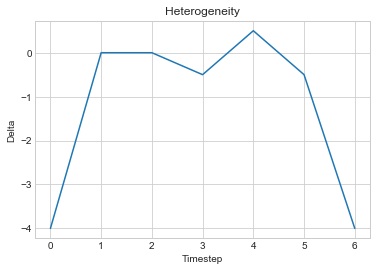

In [8]:
# Check heterogeneity again
delta_t = rec.get_heterogeneity()